In [1]:
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
from glob import glob

from collections import OrderedDict

import xarray as xr
import numpy as np

import distributed
import dask_jobqueue
import dask

import esmlab

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

In [2]:
# cluster = dask_jobqueue.SLURMCluster(
#     cores=1, processes=1, memory='25GB',
#     walltime='02:00:00', project='ncgd0011')

# client = dask.distributed.Client(cluster)

In [3]:
# cluster.adapt(minimum=2, maxmimum=24, wait_count=600)

In [4]:
#client

In [5]:
#other tseries files to look at:
#'/glade/collections/cdg/timeseries-cmip6/b.e21.BSSP585cmip6.f09_g17.CMIP6-SSP5-8.5.001/ocn/proc/tseries/month_1/b.e21.BSSP585cmip6.f09_g17.CMIP6-SSP5-8.5.001.pop.h.photoC_TOT_zint.*'

In [6]:
case = 'g.e21.G1850ECOIAF.T62_g16.002'
path = '/glade/scratch/klindsay/archive/' + case + '/ocn/proc/tseries/month_1'


#case = 'g.e21.G1850ECOIAF.T62_g16.001'
#path = '/glade/scratch/kristenk/archive/' + case + '/ocn/proc/tseries/month_1'

In [7]:
path

'/glade/scratch/klindsay/archive/g.e21.G1850ECOIAF.T62_g16.002/ocn/proc/tseries/month_1'

In [ ]:
variables = ['AOU','NO3', 'PO4', 'SiO3','O2']

ds_list = []

print(f'reading {case}')

ds = xr.Dataset()

for v in variables:
    
    #print(f'{path}/{case}.pop.h.{v}.??????-??????.nc')
    
    
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.??????-??????.nc'))       

    dsv = xr.open_mfdataset(files, decode_times=False, decode_coords=False)
    ds = xr.merge((ds, dsv))
    ds_list.append(ds)

reading g.e21.G1850ECOIAF.T62_g16.002


In [ ]:
ds.AOU.isel(time=0, z_t=10).plot();

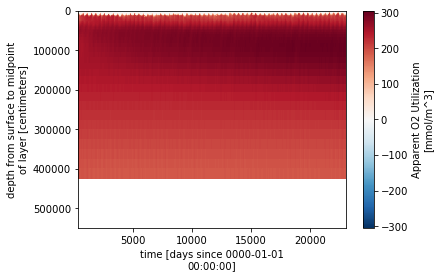

In [18]:
test=ds.AOU.isel(nlon=250,nlat=200)
test=test.transpose()
test.plot()

plt.gca().invert_yaxis()

In [19]:
#let's take a point in the equatorial pacific, and look at it over time
pac_aou_slice=ds.AOU.isel(nlon=250, nlat=200)
pac_no3_slice=ds.NO3.isel(nlon=250, nlat=200)
pac_o2_slice=ds.O2.isel(nlon=250, nlat=200)

In [20]:
#transpose these to be depth versus time
pac_aou_slice=pac_aou_slice.transpose()
pac_no3_slice=pac_no3_slice.transpose()
pac_o2_slice=pac_o2_slice.transpose()

In [21]:
#put time in years
time_axis=ds.time.values/365.

In [22]:
#put depth in meters
depth_axis=ds.z_t.values/100.

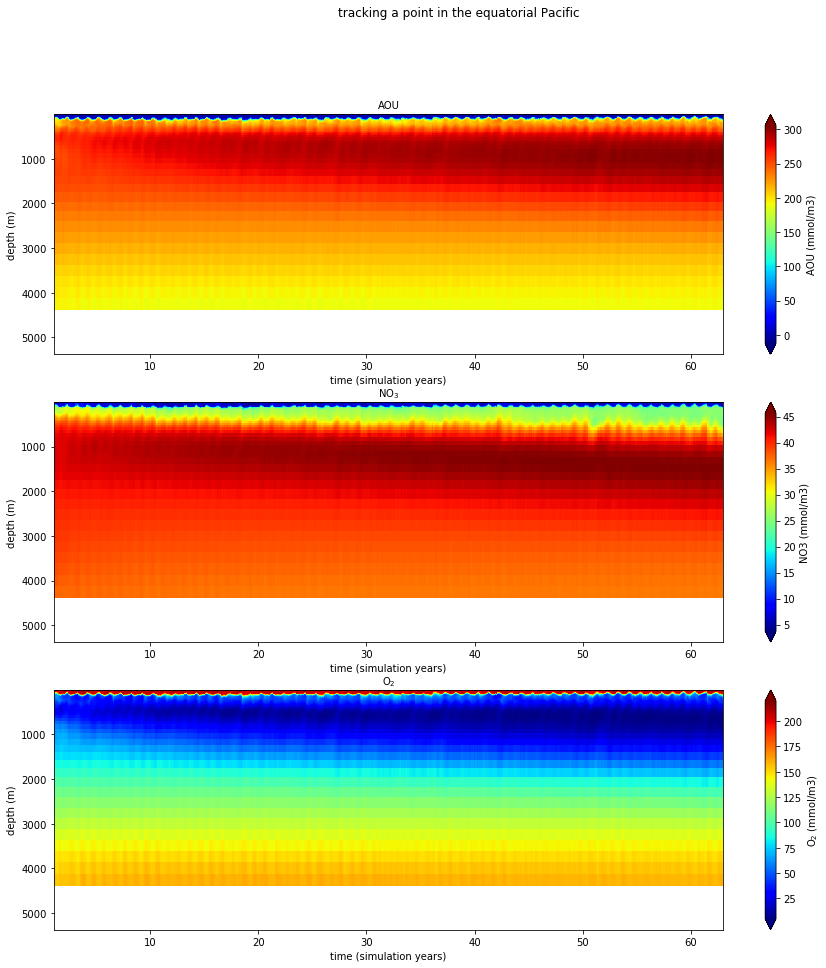

In [23]:
fig = plt.figure(figsize=(15,15))

plt.suptitle('tracking a point in the equatorial Pacific', fontsize=12)

ax = fig.add_subplot(3,1,1)
ax.set_title('AOU', fontsize=10)
pc=ax.pcolormesh(time_axis, depth_axis, pac_aou_slice, cmap='jet')
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='AOU (mmol/m3)')
ax.set(ylabel='depth (m)', xlabel='time (simulation years)')
ax.invert_yaxis()
             
             
ax = fig.add_subplot(3,1,2)
ax.set_title('NO$_3$', fontsize=10)
pc=ax.pcolormesh(time_axis, depth_axis, pac_no3_slice, cmap='jet')
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='NO3 (mmol/m3)')
ax.set(ylabel='depth (m)', xlabel='time (simulation years)')
ax.invert_yaxis()       
             
    
    
ax = fig.add_subplot(3,1,3)
ax.set_title('O$_2$', fontsize=10)
pc=ax.pcolormesh(time_axis, depth_axis, pac_o2_slice, cmap='jet')
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='O$_2$ (mmol/m3)')
ax.set(ylabel='depth (m)', xlabel='time (simulation years)')
ax.invert_yaxis()    

CPU times: user 1min 34s, sys: 12.3 s, total: 1min 46s
Wall time: 1min 46s


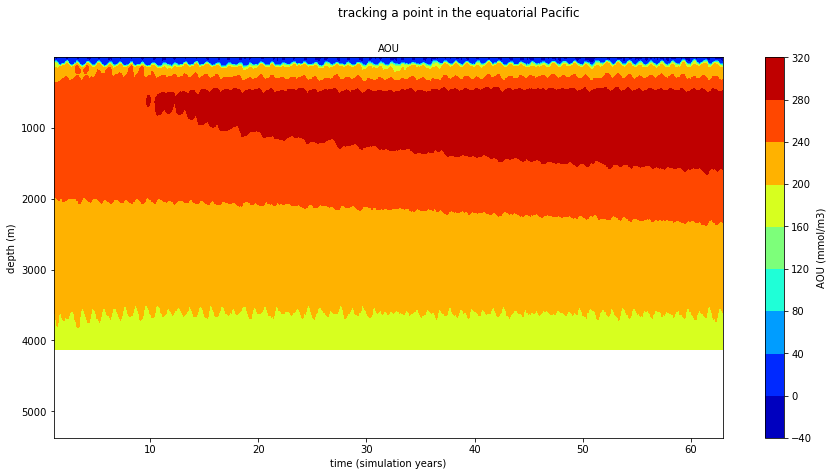

In [25]:
%%time
fig = plt.figure(figsize=(15,7))

plt.suptitle('tracking a point in the equatorial Pacific', fontsize=12)

ax = fig.add_subplot(1,1,1)
ax.set_title('AOU', fontsize=10)
pc=ax.contourf(time_axis, depth_axis, pac_aou_slice, cmap='jet')
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='AOU (mmol/m3)')
ax.set(ylabel='depth (m)', xlabel='time (simulation years)')
ax.invert_yaxis()

In [ ]:
#what are the exact lon and lat of this point in the pacific?
#(nlon=250, nlat=200)
#remove time dimension
latgrid = ds.TLAT.mean(dim='time')
longrid = ds.TLONG.mean(dim='time')

In [ ]:
lat_pt=latgrid.isel(nlon=250, nlat=200).compute()
lon_pt=longrid.isel(nlon=250, nlat=200).compute()

In [ ]:
lat_pt, lon_pt #so 3.6 deg N and 118.2 deg W

In [ ]:
#zoom in on first 10 years
pac_aou_slice=pac_aou_slice.isel(time=slice(0,120))
pac_no3_slice=pac_no3_slice.isel(time=slice(0,120))
pac_o2_slice=pac_o2_slice.isel(time=slice(0,120))

In [ ]:
pac_aou_slice

In [ ]:
#put time in years, remaking time axis to be only the first ten years
time_axis=pac_o2_slice.time.values/365.

In [ ]:
fig = plt.figure(figsize=(15,15))

plt.suptitle('tracking a point in the equatorial Pacific', fontsize=12)

ax = fig.add_subplot(3,1,1)
ax.set_title('AOU', fontsize=10)
pc=ax.pcolormesh(time_axis, depth_axis, pac_aou_slice, cmap='jet')
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='AOU (mmol/m3)')
ax.set(ylabel='depth (m)', xlabel='time (simulation years)')
ax.invert_yaxis()
             
             
ax = fig.add_subplot(3,1,2)
ax.set_title('NO$_3$', fontsize=10)
pc=ax.pcolormesh(time_axis, depth_axis, pac_no3_slice, cmap='jet')
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='NO3 (mmol/m3)')
ax.set(ylabel='depth (m)', xlabel='time (simulation years)')
ax.invert_yaxis()       
             
    
    
ax = fig.add_subplot(3,1,3)
ax.set_title('O$_2$', fontsize=10)
pc=ax.pcolormesh(time_axis, depth_axis, pac_o2_slice, cmap='jet')
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='O$_2$ (mmol/m3)')
ax.set(ylabel='depth (m)', xlabel='time (simulation years)')
ax.invert_yaxis()    

In [ ]:
#make a difference plot of AOU first 5 years mean minus last 5 years mean
pac_aou_lonslice1=ds.AOU.isel(nlat=200, time=slice(0,60)).mean(dim='time')
pac_aou_lonslice2=ds.AOU.isel(nlat=200, time=slice(1428,1488)).mean(dim='time')
# pac_no3_slice=ds.NO3.isel(nlon=250, nlat=200)
# pac_o2_slice=ds.O2.isel(nlon=250, nlat=200)

In [ ]:
pac_aou_lonslice.plot()
plt.gca().invert_yaxis()

In [ ]:
fig = plt.figure(figsize=(15,15))

plt.suptitle('A cross section at 3.6degN', fontsize=12)

ax = fig.add_subplot(3,1,1)
ax.set_title('AOU first 5 years mean', fontsize=10)
pc=ax.pcolormesh(pac_aou_lonslice1.nlon, pac_aou_lonslice1.z_t/100., pac_aou_lonslice1, 
                 cmap='jet', vmin=0, vmax=300)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='AOU (mmol/m3)')
ax.set(ylabel='depth (m)', xlabel='longitude (deg east)')
ax.invert_yaxis()
             
             
ax = fig.add_subplot(3,1,2)
ax.set_title('AOU last 5 years mean', fontsize=10)
pc=ax.pcolormesh(pac_aou_lonslice2.nlon, pac_aou_lonslice2.z_t/100., pac_aou_lonslice2, 
                 cmap='jet', vmin=0, vmax=300)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='AOU (mmol/m3)')
ax.set(ylabel='depth (m)', xlabel='longitude (deg east)')
ax.invert_yaxis()       
             
    
    
ax = fig.add_subplot(3,1,3)
ax.set_title('AOU last 5 years minus first 5 years', fontsize=10)
pc=ax.pcolormesh(pac_aou_lonslice2.nlon, pac_aou_lonslice2.z_t/100., pac_aou_lonslice2-pac_aou_lonslice1, 
                 cmap='bwr', vmin=-80, vmax=80)
cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='AOU diff(mmol/m3)')
ax.set(ylabel='depth (m)', xlabel='longitude (deg east)')
ax.invert_yaxis()    